100%|██████████| 170M/170M [00:05<00:00, 29.9MB/s]



Training with SGD + Momentum...
Epoch 1: Loss = 1.6981, Accuracy = 40.36%
Epoch 2: Loss = 1.4809, Accuracy = 48.25%
Epoch 3: Loss = 1.3850, Accuracy = 51.96%
Epoch 4: Loss = 1.3119, Accuracy = 54.35%
Epoch 5: Loss = 1.2518, Accuracy = 56.62%
Epoch 6: Loss = 1.2033, Accuracy = 58.18%
Epoch 7: Loss = 1.1557, Accuracy = 59.82%
Epoch 8: Loss = 1.1186, Accuracy = 61.20%
Epoch 9: Loss = 1.0852, Accuracy = 62.37%
Epoch 10: Loss = 1.0389, Accuracy = 64.12%

Training with Adam...
Epoch 1: Loss = 1.6403, Accuracy = 42.59%
Epoch 2: Loss = 1.4358, Accuracy = 49.72%
Epoch 3: Loss = 1.3446, Accuracy = 53.11%
Epoch 4: Loss = 1.2757, Accuracy = 55.56%
Epoch 5: Loss = 1.2224, Accuracy = 57.62%
Epoch 6: Loss = 1.1627, Accuracy = 59.75%
Epoch 7: Loss = 1.1149, Accuracy = 61.24%
Epoch 8: Loss = 1.0650, Accuracy = 63.14%
Epoch 9: Loss = 1.0189, Accuracy = 64.77%
Epoch 10: Loss = 0.9769, Accuracy = 66.14%


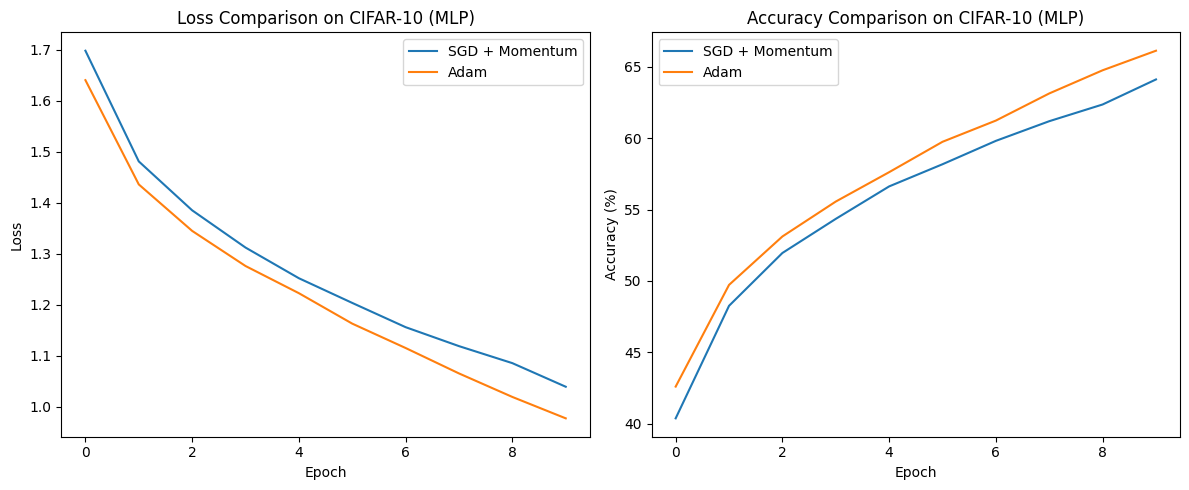

In [1]:
# Step 1: Import Necessary Libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Step 2: Set Device and Load Dataset
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    transform=transform,
    download=True
)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)

# Step 3: Define MLP Model
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.net = nn.Sequential(
            nn.Linear(3 * 32 * 32, 256),
            nn.ReLU(),
            nn.Linear(256, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        return self.net(x)

# Step 4: Define Training Function
def train(model, optimizer, epochs=10):
    model.to(device)
    loss_fn = nn.CrossEntropyLoss()
    losses = []
    accuracies = []

    for epoch in range(epochs):
        total_loss = 0
        correct = 0
        total = 0
        model.train()

        for imgs, labels in trainloader:
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            loss = loss_fn(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        avg_loss = total_loss / len(trainloader)
        accuracy = 100.0 * correct / total
        losses.append(avg_loss)
        accuracies.append(accuracy)
        print(f"Epoch {epoch + 1}: Loss = {avg_loss:.4f}, Accuracy = {accuracy:.2f}%")

    return losses, accuracies

# Step 5: Train with SGD + Momentum and with Adam
print("\nTraining with SGD + Momentum...")
model_sgd = MLP()
sgd = optim.SGD(model_sgd.parameters(), lr=0.01, momentum=0.9)
losses_sgd, acc_sgd = train(model_sgd, sgd)

print("\nTraining with Adam...")
model_adam = MLP()
adam = optim.Adam(model_adam.parameters(), lr=0.001)
losses_adam, acc_adam = train(model_adam, adam)

# Step 6: Visualize Loss and Accuracy Comparison
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(losses_sgd, label="SGD + Momentum")
plt.plot(losses_adam, label="Adam")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Comparison on CIFAR-10 (MLP)")
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(acc_sgd, label="SGD + Momentum")
plt.plot(acc_adam, label="Adam")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Comparison on CIFAR-10 (MLP)")
plt.legend()

plt.tight_layout()
plt.show()
